# 225229131

# Lab5. Text corpus creation and binary classification using DNN

In [1]:
#Importing modules
import pandas as pd
import numpy as np
df=pd.read_csv('textdataset.csv',delimiter=',', encoding='latin-1')
df

,Text,Class
0,You will succeed if you don't quit.,1
1,All our dreams can come true.,1
2,Champions keep playing to get it right.,1
3,"Believe in yourself, you're braver than you th...",1
4,Success comes to those who seek it out.,1
5,Success is getting what you want.,1
6,There is no substitute for victory.,1
7,Setting goals is the key to success.,1
8,Winning takes talent.,1
9,Turning dreams into reality starts with settin...,1


In [2]:
#EDA
df.head()

,Text,Class
0,You will succeed if you don't quit.,1
1,All our dreams can come true.,1
2,Champions keep playing to get it right.,1
3,"Believe in yourself, you're braver than you th...",1
4,Success comes to those who seek it out.,1


In [3]:
df.shape

(40, 2)

In [4]:
df.dtypes

Text     object
Class     int64
dtype: object

In [5]:
df.isna().value_counts()

Text   Class
False  False    40
dtype: int64

In [6]:
df['Class'].value_counts()

1    20
0    20
Name: Class, dtype: int64

#### Step 2

In [7]:
#Preprocessing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
def preprocess_text(text):
    translator=str.maketrans('', '', string.punctuation)
    text=text.translate(translator).lower() #Lowercase
    words=word_tokenize(text) #Tokenize
    return words
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
df['cleaned_text'] = df['Text'].apply(lambda x: ' '.join([word for word in preprocess_text(x) if word not in stop_words]))
X=df['cleaned_text'] 
y=df['Class']

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
X

0                                     succeed dont quit
1                                      dreams come true
2                      champions keep playing get right
3                            believe youre braver think
4                                    success comes seek
5                                  success getting want
6                                    substitute victory
7                             setting goals key success
8                                  winning takes talent
9           turning dreams reality starts setting goals
10                 education powerful tool change world
11                            success learning failures
12                           optimism leads achievement
13    talent wins games intelligence wins championships
14                   love family work hard live passion
15                                           best thats
16                                dream big achieve big
17                             courage muscle gr

#### Step 3

In [9]:
from sklearn.model_selection import train_test_split #train test split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
tfidf_vectorizer=TfidfVectorizer() #Vectorization 
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
unique_words=tfidf_vectorizer.get_feature_names_out()
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [10]:
X_train.shape

(30,)

In [11]:
y_train.shape

(30,)

In [12]:
X_test.shape

(10,)

In [13]:
y_test.shape

(10,)

#### Step 4

In [14]:
from keras.models import Sequential #Creating and building the models
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(Dense(32,input_shape=(len(unique_words),), activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_tfidf.toarray(),y_train, epochs=100, batch_size=32) #best epoch

Epoch 1/100
1/1 [==============================] - 1s 952ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6899 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6865 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6831 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6798 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6765 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6732 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6699 - accuracy: 0.5667
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6666 - accuracy: 0.5667
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6634 - accuracy: 0.5667
Epoch 11/100
1/1 [=

In [15]:
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test) #Model evaluation
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 218ms/step - loss: 0.7078 - accuracy: 0.6000
Test Loss: 0.7077654600143433, Test Accuracy: 0.6000000238418579


#### Step 5

##### 5a

In [16]:
#Creating models for various nodes for single neural layer
def train_single_layer_model(num_nodes):
    model=Sequential()
    model.add(Dense(num_nodes, input_shape=(len(unique_words),), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    start_time=time.time()
    history=model.fit(X_train_tfidf.toarray(), y_train, epochs=100, batch_size=32, verbose=0) #best epoch
    end_time=time.time()
    elapsed_time=end_time-start_time

    num_parameters=model.count_params()
    training_accuracy=history.history['accuracy'][-1]
    testing_loss,testing_accuracy=model.evaluate(X_test_tfidf.toarray(), y_test)

    return num_parameters, training_accuracy, testing_accuracy, elapsed_time

In [17]:
import time
nodes_list=[8, 16, 32, 64, 128, 256, 512, 1028]
num_parameters_list=[] #Creating lists to store the values of models
training_accuracy_list=[]
testing_accuracy_list=[]
running_time_list=[]

for num_nodes in nodes_list:
    num_parameters, training_accuracy, testing_accuracy, elapsed_time = train_single_layer_model(num_nodes)
    num_parameters_list.append(num_parameters)
    training_accuracy_list.append(training_accuracy)
    testing_accuracy_list.append(testing_accuracy)
    running_time_list.append(elapsed_time)

1/1 [==============================] - 0s 162ms/step - loss: 1.1194 - accuracy: 0.7000


In [18]:
print("Parameters: ",num_parameters_list)
print("Training accuracy:",training_accuracy_list)
print("Testing Accuracy:",testing_accuracy_list)
print("Elapsed time:",running_time_list)

Parameters:  [905, 1809, 3617, 7233, 14465, 28929, 57857, 116165]
Training accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing Accuracy: [0.5, 0.699999988079071, 0.5, 0.6000000238418579, 0.699999988079071, 0.6000000238418579, 0.6000000238418579, 0.699999988079071]
Elapsed time: [1.3562860488891602, 1.3376076221466064, 1.3337469100952148, 1.3360636234283447, 1.342658281326294, 1.3627052307128906, 1.3878157138824463, 1.4854001998901367]


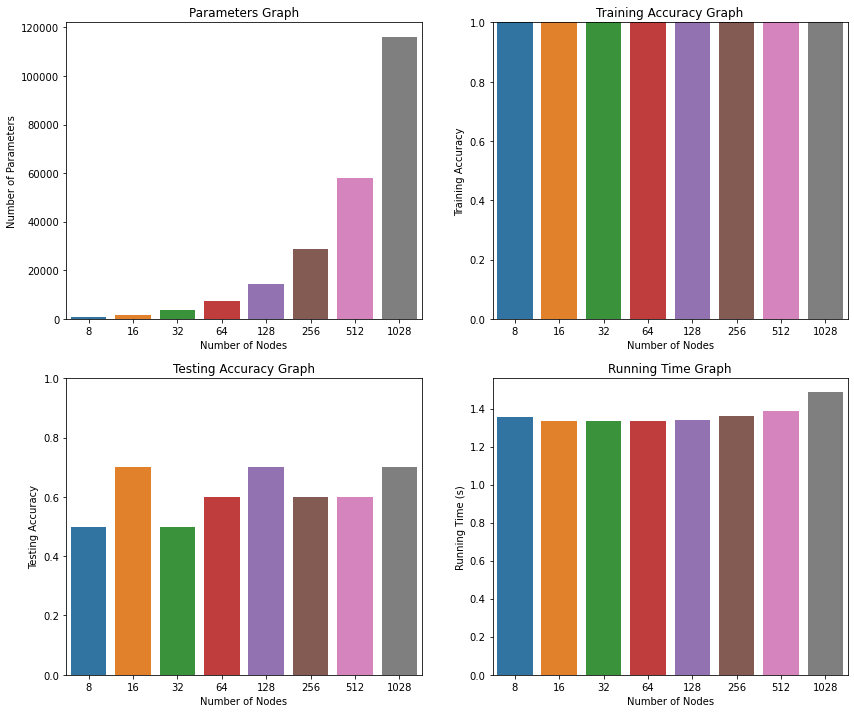

In [19]:
#Creating Bargraph for the values
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.barplot(x=nodes_list, y=num_parameters_list, ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Nodes')
axes[0, 0].set_ylabel('Number of Parameters')
axes[0, 0].set_title('Parameters Graph')
sns.barplot(x=nodes_list, y=training_accuracy_list, ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Nodes')
axes[0, 1].set_ylabel('Training Accuracy')
axes[0, 1].set_title('Training Accuracy Graph')
axes[0, 1].set_ylim([0, 1])
sns.barplot(x=nodes_list, y=testing_accuracy_list, ax=axes[1, 0])
axes[1, 0].set_xlabel('Number of Nodes')
axes[1, 0].set_ylabel('Testing Accuracy')
axes[1, 0].set_title('Testing Accuracy Graph')
axes[1, 0].set_ylim([0, 1])
sns.barplot(x=nodes_list, y=running_time_list, ax=axes[1, 1])
axes[1, 1].set_xlabel('Number of Nodes')
axes[1, 1].set_ylabel('Running Time (s)')
axes[1, 1].set_title('Running Time Graph')
plt.show()

##### 5b

In [20]:
#Creating models for various layers with constant nodes
def train_multi_layer_model(num_nodes):
    model=Sequential()
    model.add(Dense(32,input_shape=(len(unique_words),),activation='relu'))
    for _ in range(num_layers-1):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    start_time=time.time()
    history=model.fit(X_train_tfidf.toarray(), y_train, epochs=100, batch_size=32, verbose=0)
    end_time=time.time()
    elapsed_time=end_time-start_time

    num_parameters=model.count_params()
    training_accuracy= history.history['accuracy'][-1]
    testing_loss,testing_accuracy=model.evaluate(X_test_tfidf.toarray(),y_test)

    return num_parameters, training_accuracy, testing_accuracy, elapsed_time

In [21]:
layers_list=[2, 3, 4, 5]
num_parameters_list=[]
training_accuracy_list=[]
testing_accuracy_list=[]
running_time_list=[]

for num_layers in layers_list:
    num_parameters, training_accuracy, testing_accuracy, elapsed_time=train_multi_layer_model(num_nodes)
    num_parameters_list.append(num_parameters)
    training_accuracy_list.append(training_accuracy)
    testing_accuracy_list.append(testing_accuracy)
    running_time_list.append(elapsed_time)

1/1 [==============================] - 0s 201ms/step - loss: 1.6236 - accuracy: 0.7000


In [22]:
print("Parameters: ",num_parameters_list)
print("Training accuracy:",training_accuracy_list)
print("Testing Accuracy:",testing_accuracy_list)
print("Elapsed time:",running_time_list)

Parameters:  [4673, 5729, 6785, 7841]
Training accuracy: [1.0, 1.0, 1.0, 1.0]
Testing Accuracy: [0.699999988079071, 0.699999988079071, 0.6000000238418579, 0.699999988079071]
Elapsed time: [2.0578131675720215, 2.1192288398742676, 1.9216132164001465, 2.1237897872924805]


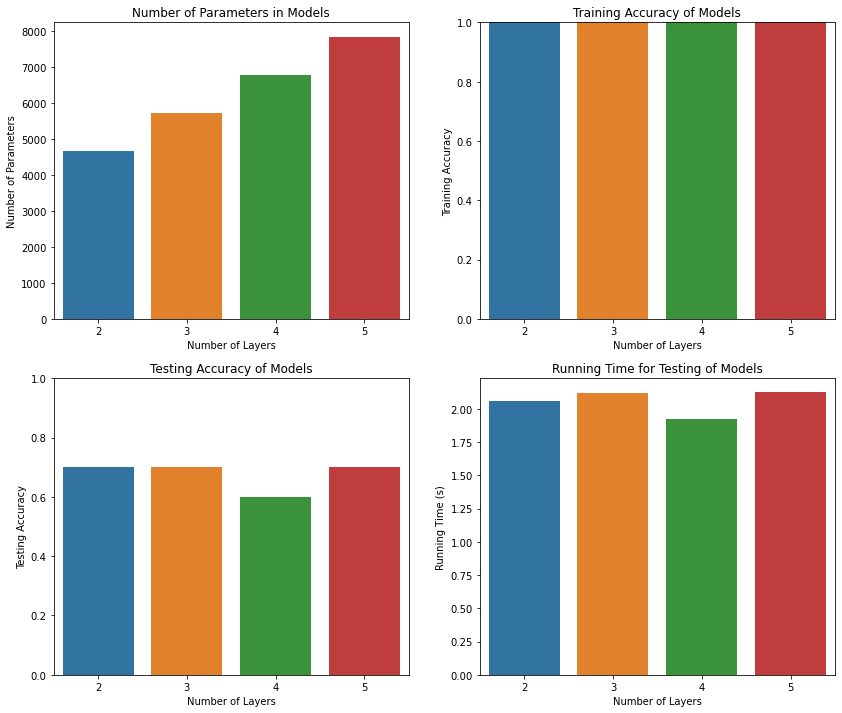

In [23]:
#Creating bargraph for the values
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(14, 12))
sns.barplot(x=layers_list,y=num_parameters_list,ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Layers')
axes[0, 0].set_ylabel('Number of Parameters')
axes[0, 0].set_title('Number of Parameters in Models')
sns.barplot(x=layers_list, y=training_accuracy_list, ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Layers')
axes[0, 1].set_ylabel('Training Accuracy')
axes[0, 1].set_title('Training Accuracy of Models')
axes[0, 1].set_ylim([0, 1])  
sns.barplot(x=layers_list, y=testing_accuracy_list, ax=axes[1, 0])
axes[1, 0].set_xlabel('Number of Layers')
axes[1, 0].set_ylabel('Testing Accuracy')
axes[1, 0].set_title('Testing Accuracy of Models')
axes[1, 0].set_ylim([0, 1])  
sns.barplot(x=layers_list, y=running_time_list, ax=axes[1, 1])
axes[1, 1].set_xlabel('Number of Layers')
axes[1, 1].set_ylabel('Running Time (s)')
axes[1, 1].set_title('Running Time for Testing of Models')
plt.show()